In [112]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
import pandas as pd
from random import choice
from helpers.mappers import acaps_country_name_mapper, acaps_measure_mapper
from helpers.utils import generate_dates
from helpers.data_extractors import extract_acaps_measure_data,extract_oxford_measure_data,merge_country_dfs
from helpers.data_extractors import calculate_transmission_data
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns
sns.set()

In [129]:
country_name = 'UK'

In [130]:
acaps_dfs = extract_acaps_measure_data()
oxford_dfs = extract_oxford_measure_data()
merged_df = merge_country_dfs(acaps_dfs[country_name],oxford_dfs[country_name])

In [131]:
daily_cases,dates = calculate_transmission_data(country_name,time_window=2)

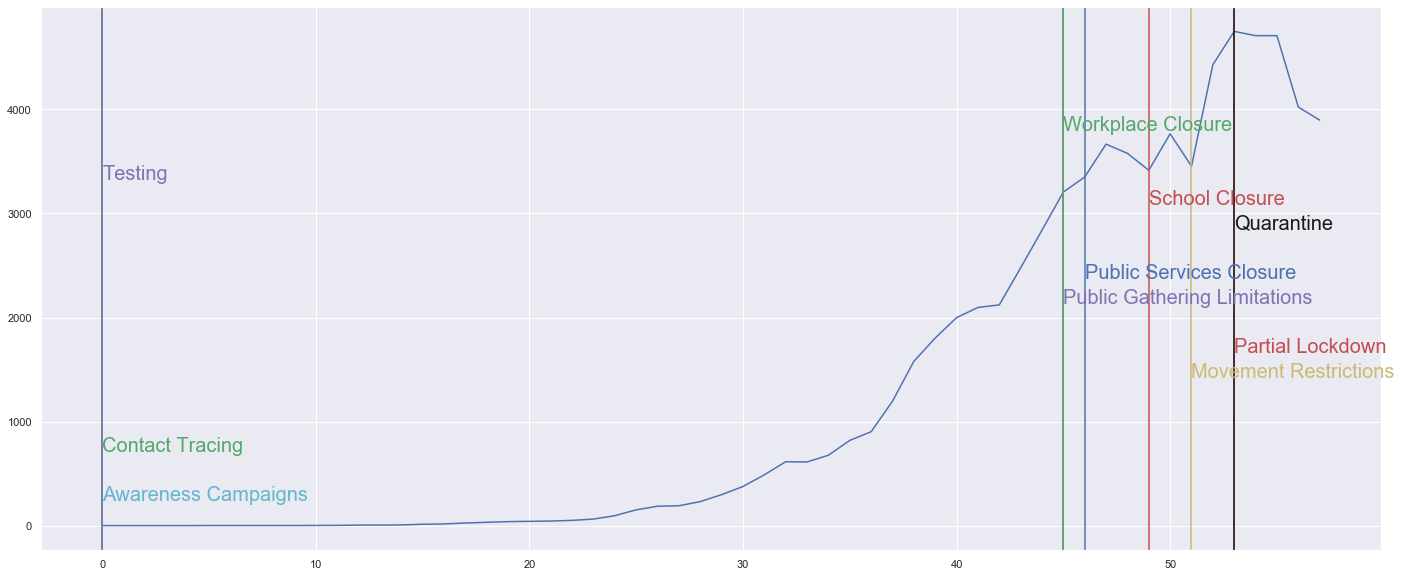

In [132]:
fig,ax = plt.subplots(figsize=(24,10))
ax.plot(daily_cases)
colors = ['b','g','r','c','m','y','k']

for idx,measure in enumerate(merged_df.columns):
    if measure == 'Date' or merged_df[measure].max() == 0: # measure never taken
        continue
    
    try:
        measure_date = merged_df['Date'][merged_df[measure].idxmax()].date()
        adjusted_date = measure_date + timedelta(days=18)
        if adjusted_date not in dates:
            x_idx = 0
        else:
            x_idx = dates.index(adjusted_date)
        y_value = daily_cases[x_idx]
        if len(colors) == 0:
            colors = ['b','g','r','c','m','y','k']
            
        color = choice(colors)
        colors.remove(color)
        ax.axvline(x=x_idx,ymin=0,ymax=1,color=color,alpha=1.0)
        ax.text(x_idx,idx*max(daily_cases)/20,measure,color=color,fontsize=20)
    
    except Exception as e:
        pass

    

In [118]:
countries_daily_cases = {}
for country_name in country_dfs.keys():
    daily_cases = calculate_transmission_data(country_name)
    countries_daily_cases[country_name] = daily_cases

In [119]:
countries_daily_cases['Germany']

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.4,
  2.0,
  6.4,
  11.6,
  12.2,
  20.8,
  23.4,
  25.8,
  36.6,
  83.0,
  101.0,
  119.4,
  155.6,
  135.8,
  179.0,
  233.2,
  341.0,
  490.2,
  606.8,
  769.4,
  905.4,
  1138.4,
  1545.6,
  1901.4,
  2515.2,
  2599.4,
  2509.2,
  2747.2,
  2628.6,
  2991.8,
  3813.0,
  4363.0,
  4940.8,
  5022.4,
  4589.4,
  4187.4,
  4057.2,
  4471.8,
  4854.8,
  4856.8,
  4428.4,
  3716.2,
  3300.8,
  3440.8,
  3622.4,
  3759.2,
  3557.8,
  2911.6,
  2367.4,
  2007.8,
  1860.2],
 [datetime.date(2020, 2, 18),
  datetime.date(2020, 2, 19),
  datetime.date(2020, 2, 20),
  datetime.date(2020, 2, 21),
  datetime.date(2020, 2, 22),
  datetime.date(2020, 2, 23),
  datetime.date(2020, 2, 24),
  datetime.date(2020, 2, 25),
  datetime.date(2020, 2, 26),
  datetime.date(2020, 2, 27),
  datetime.date(2020, 2, 28),
  datetime.date(2020, 2, 29),
  datetime.date(2020, 3, 1),
  datetime.date(2020, 3, 2),
  datetime.date(2020, 3, 3),
  datetime.date(2020, 3, 4)

In [ ]:
country_dfs['Germany']